In [14]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns


Mostramos todas las features del dataset a analizar

In [15]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('./spotify', "*.csv"))))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41106 entries, 0 to 7765
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float64
 17 

Estas variables en principio no las vamos a usar, entonces las eliminamos

In [36]:
df.drop(columns=['track', 'artist', 'uri'], inplace=True)

Nos aseguramos que los datos estén distribuidos de manera pareja en cada clase, porque eso puede afectar a la clasificación final

In [16]:
print("Categorías: ", df['target'].unique())
print("Cantidad de registros de cada categoría: ", df['target'].value_counts())

Categorías:  [0 1]
Cantidad de registros de cada categoría:  target
0    20553
1    20553
Name: count, dtype: int64


Visualizamos los datos numéricos

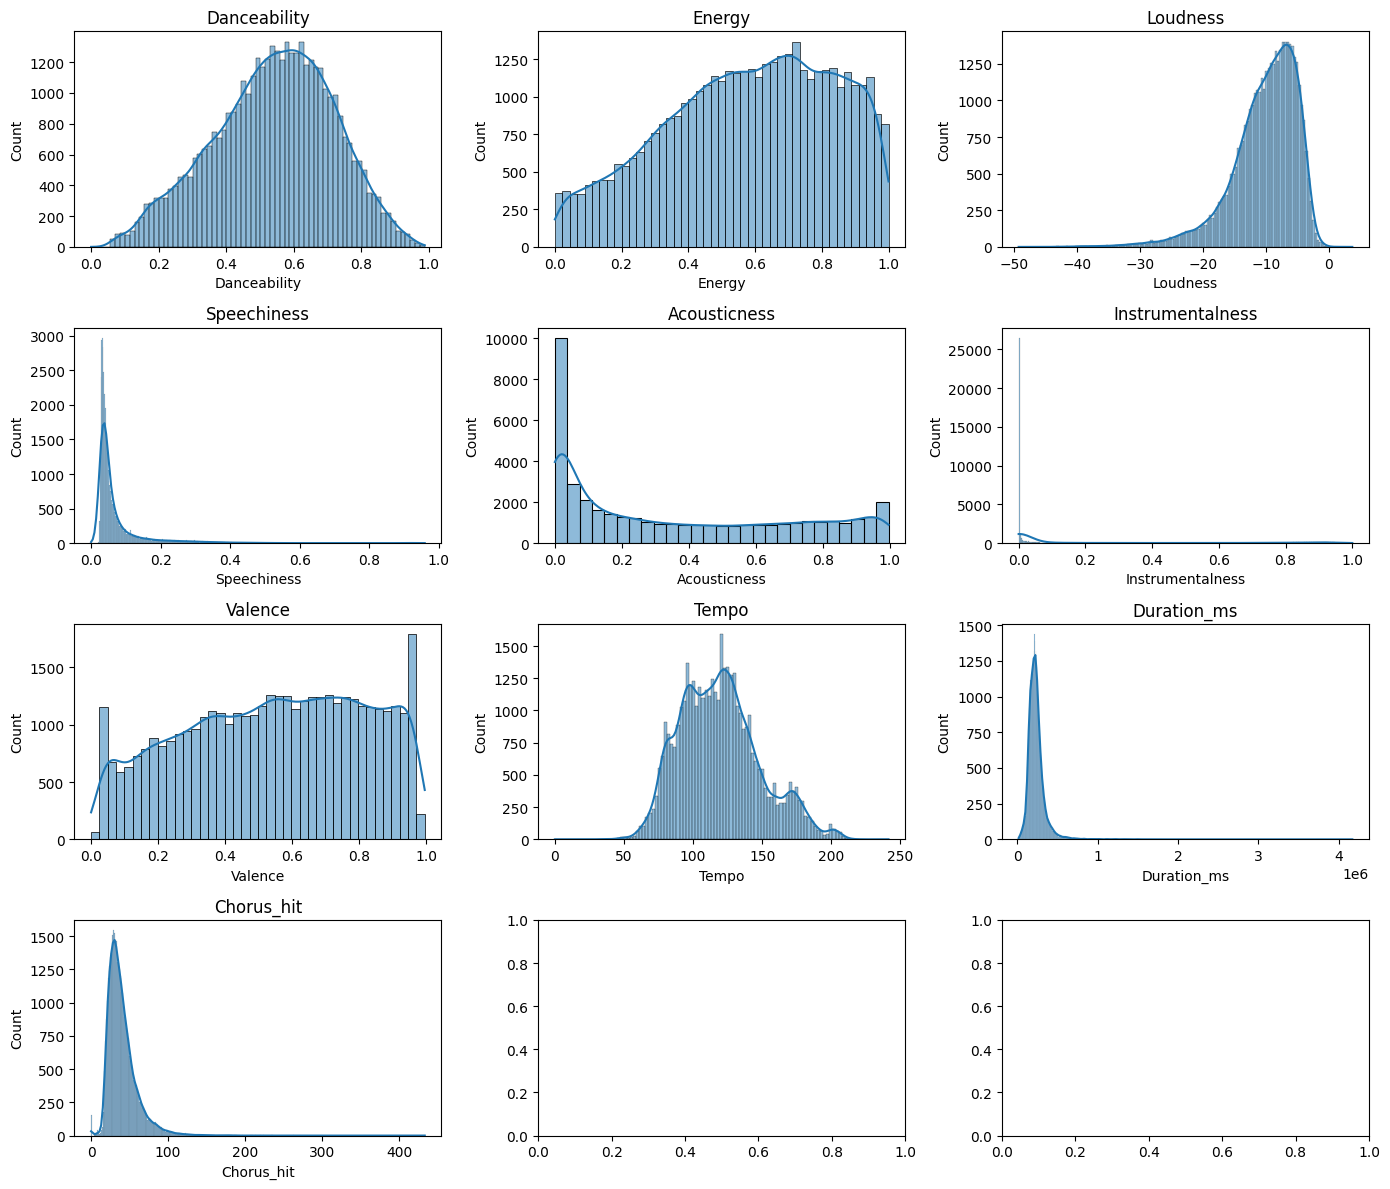

<module 'seaborn' from '/Users/tcanzoniero/Documents/up/dataScience/venv/lib/python3.11/site-packages/seaborn/__init__.py'>

In [4]:
fig, axes = plt.subplots(4, 3, figsize=(14, 12))
axes = axes.flatten()

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'duration_ms', 'chorus_hit']

for i, feature in enumerate(features):
    sns.histplot(data=df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())

plt.tight_layout()
plt.show()
sns

Visualizamos los datos categóricos

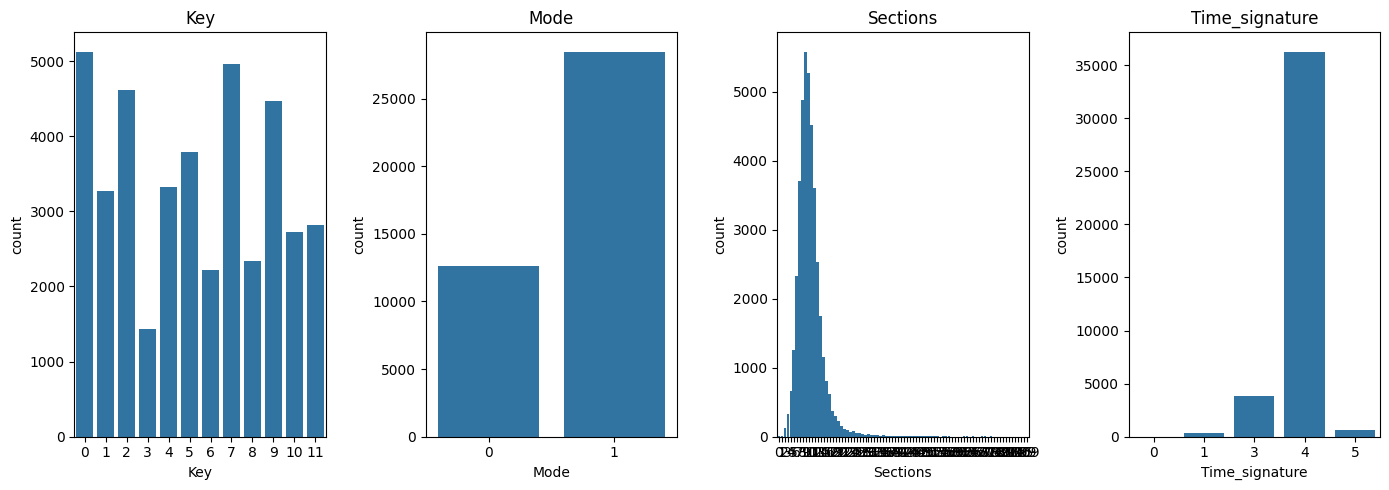

<module 'seaborn' from '/Users/tcanzoniero/Documents/up/dataScience/venv/lib/python3.11/site-packages/seaborn/__init__.py'>

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(14, 5))
axes = axes.flatten()

features = ['key', 'mode', 'sections', 'time_signature']

for i, feature in enumerate(features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())

plt.tight_layout()
plt.show()
sns

Verificamos si hay valores nulos en alguna feature

In [17]:
df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

En base a los gráficos vistos anteriormente se analizarán algunas features en profundidad que son candidatas a tener outliers. Por el momento solo se identificarán, más adelante se decidirá que tratamiento se les da

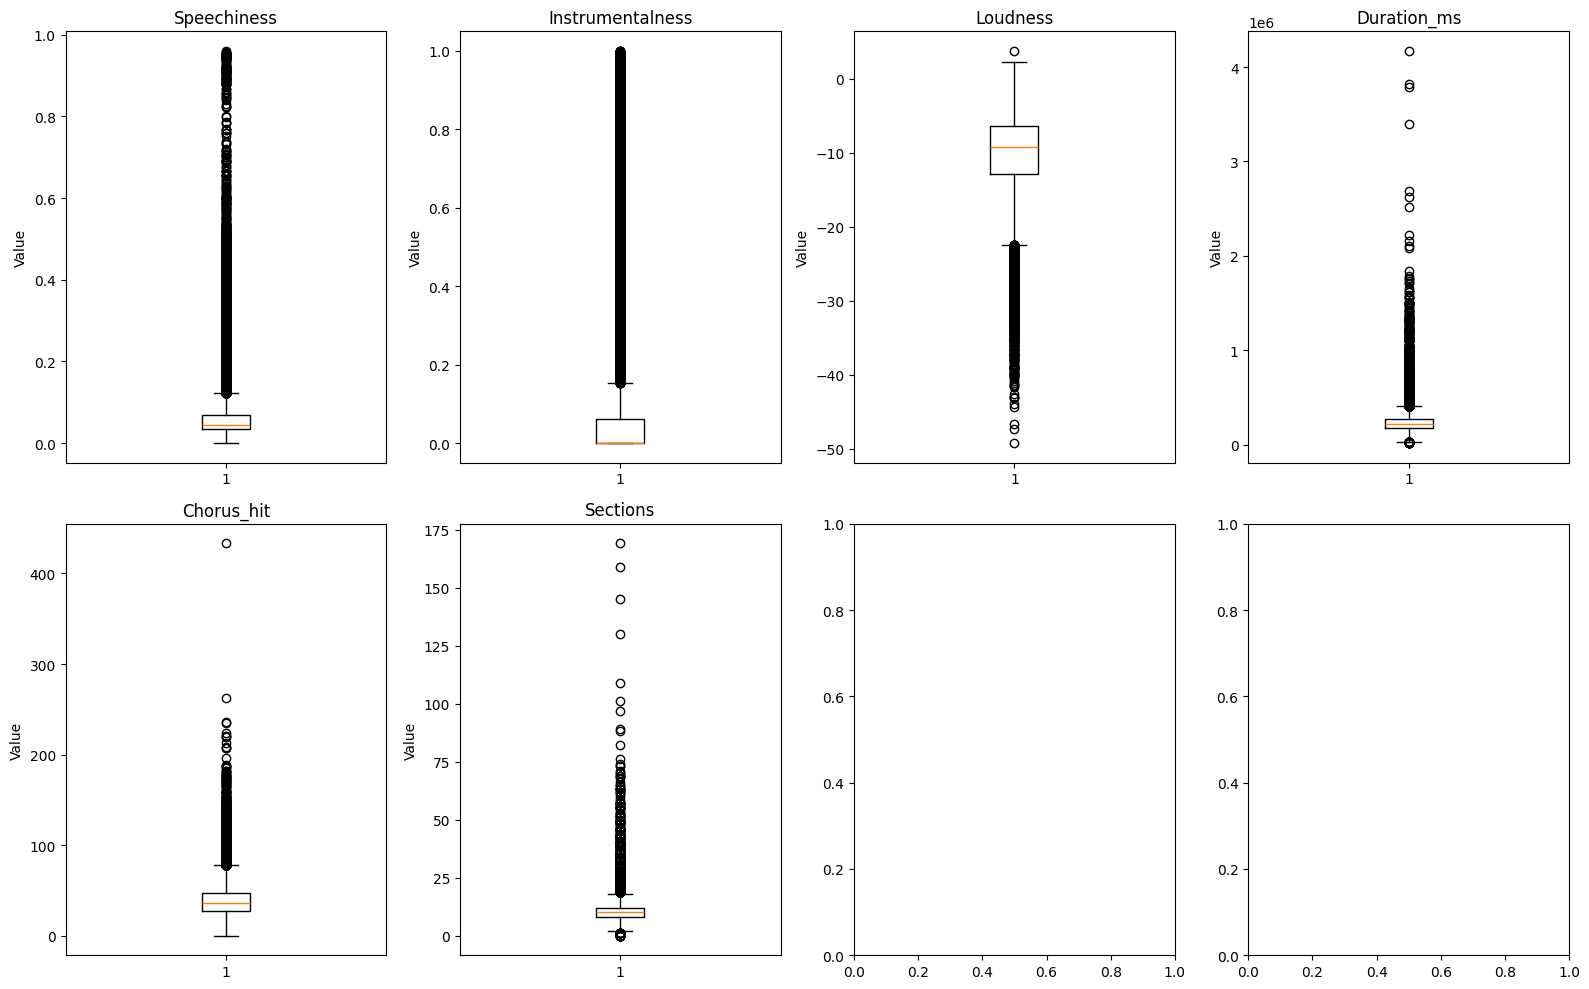

In [33]:
features_to_plot = ['speechiness', 'instrumentalness', 'loudness', 'duration_ms', 'chorus_hit', 'sections']

fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    axes[i].boxplot(df[feature], showfliers=True)
    axes[i].set_title(f'{feature.capitalize()}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()



Se puede ver que estas variables probablemente prensenten outliers, quizá valga la pena filtrar ciertos valores

Ahora vamos a graficar una matriz de correlación para intentar definir las features más importantes y reducir la complejidad del problema

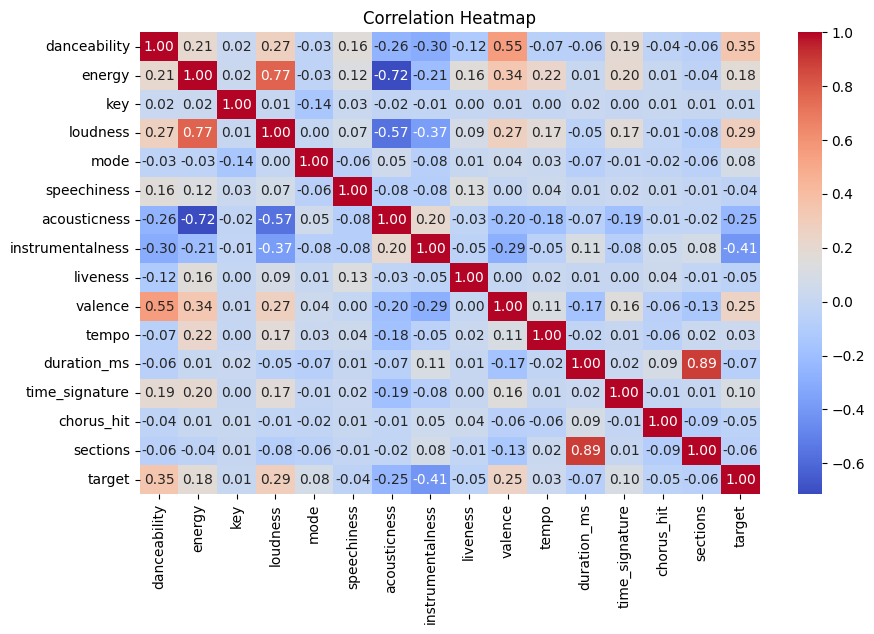

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()